In [2]:
# generate 2d classification dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


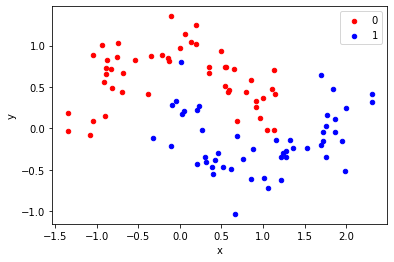

In [3]:

# generate two moons dataset
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [4]:

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Train: 1.000, Test: 0.914


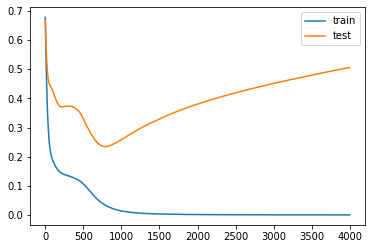

In [7]:

from keras.models import Sequential
from keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Train: 1.000, Test: 0.929


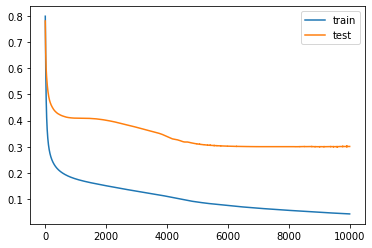

In [23]:

# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import Dropout
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(l2=0.05)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],)
# simple early stopping
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=10000, verbose=0, callbacks=[])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.967, Test: 0.800


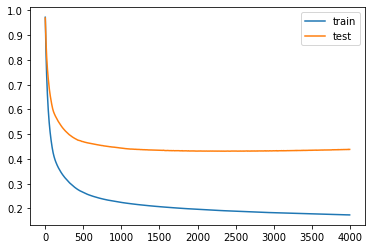

In [21]:

# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2
from keras.layers import Dropout
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=L1L2(l1=0.01,l2=0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],)
# simple early stopping
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()